# 6. Figures

## Import Packages

In [1]:
import sys

sys.path.append("../../")
sys.path.append('../../src')

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model
from m3_learning.nn.Fitter1D.Fitter1D import Multiscale1DFitter, Model
from m3_learning.nn.Fitter1D.Fitter1D import ComplexPostProcessor
import m3_learning

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loads Data

In [3]:
# Specify the filename and the path to save the file
filename = "./data_raw_unmod.h5"
save_path = "./Data"

data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, SHO_fit_func_LSQF=SHO_fit_func_nn)

# print the contents of the file
dataset.print_be_tree()

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
   

## Figure 1

In [4]:
# instantiates the visualization object
BE_viz = Viz(dataset, printing, verbose=True)

/home/alk224/miniconda3/envs/alibek/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


./Figures/Figure_2_raw_be_experiment.png
./Figures/Figure_2_raw_be_experiment.svg


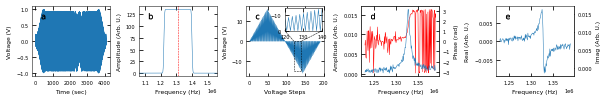

In [5]:
fig = BE_viz.raw_be(dataset, filename="Figure_2_raw_be_experiment")

In [6]:
axes = fig.axes
axes

[<Axes: xlabel='Time (sec)', ylabel='Voltage (V)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)'>,
 <Axes: xlabel='Voltage Steps', ylabel='Voltage (V)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Real (Arb. U.)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Phase (rad)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Imag (Arb. U.)'>]

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values


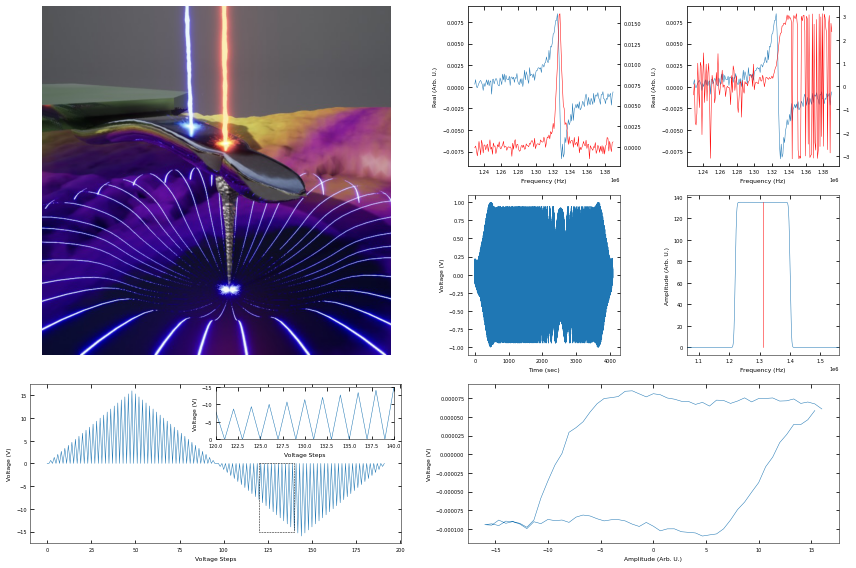

In [35]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from m3_learning.viz.layout import (
    inset_connector,
    add_box
)
import matplotlib.image as mpimg
import random

def copy_axes_properties(source_ax, target_ax, secondary_ax=None, type_ax=None):
    """Copy properties and data from source_ax to target_ax."""
    target_ax.set_xlabel(source_ax.get_xlabel())
    target_ax.set_ylabel(source_ax.get_ylabel())
    target_ax.set_xlim(source_ax.get_xlim())
    target_ax.set_ylim(source_ax.get_ylim())
        
    for line in source_ax.get_lines():
        target_ax.plot(line.get_xdata(), line.get_ydata(), color=line.get_color())
        
    if secondary_ax != None:
        if type_ax == 'twin':
            ax_twin = target_ax.twinx()
            for line in secondary_ax.get_lines():
                ax_twin.plot(line.get_xdata(), line.get_ydata(), color=line.get_color())
        else:
            ax_new = target_ax.inset_axes([0.5, 0.65, 0.48, 0.33])
            x_start = 120
            x_end = 140
            ax_new.plot(dataset.hysteresis_waveform)
            ax_new.set_xlim(x_start, x_end)
            ax_new.set_ylim(0, -15)

            # drows the inset connector
            inset_connector(
                source_ax,
                target_ax,
                ax_new,
                [(x_start, 0), (x_end, 0)],
                [(x_start, 0), (x_end, 0)],
                color="k",
                linestyle="--",
                linewidth=0.5,
            )

            # adds a box on the figure
            add_box(
                target_ax,
                (x_start, 0, x_end, -15),
                edgecolor="k",
                linestyle="--",
                facecolor="none",
                linewidth=0.5,
                zorder=10,
            )
            ax_new.set_xlabel("Voltage Steps")
            ax_new.set_ylabel("Voltage (V)")

# Create a figure
fig = plt.figure(figsize=(12, 8))  # Adjust size as needed

# Define the GridSpec layout
gs = GridSpec(3, 4, figure=fig)

order = [['AFM'], [1], [0], [4, 'twin', 6], [4, 'twin', 5], [2, 'inset', 3], ['hysteresis_loop']]

# List of axes indices in GridSpec for each subplot
subplot_specs = [(0, 2, 0, 2), (1, 2, 3, 4), (1, 2, 2, 3), 
                 (0, 1, 2, 3), (0, 1, 3, 4), (2, 3, 0, 2), (2, 3, 2, 4)]

# Create and set up subplots
for i, (r_start, r_end, c_start, c_end) in enumerate(subplot_specs):
    ax = fig.add_subplot(gs[r_start:r_end, c_start:c_end])
    if i < len(axes):
        idx = order[i]
        if idx[0] == 'AFM':
            image_path = "./Figures/AFM_tip_3D.jpeg"
            img = mpimg.imread(image_path)
            ax.imshow(img)
            ax.axis('off')  # Turn off axis for image subplot
        elif idx[0] == 'hysteresis_loop':
            raw_hysteresis_loop, voltage = dataset.get_hysteresis(
                                loop_interpolated=True, plotting_values=True)
            row = random.randint(0, 60)
            col = random.randint(0, 60)
            cycle = random.randint(0, 4)
            ax.plot(voltage.squeeze()*-1,
                       raw_hysteresis_loop[row, col, cycle, :].squeeze())
            ax.set_xlabel("Amplitude (Arb. U.)")
            ax.set_ylabel("Voltage (V)")
        elif len(idx) == 1:
            copy_axes_properties(axes[idx[0]], ax)
        else:
            copy_axes_properties(axes[idx[0]], ax, axes[idx[2]], idx[1])
            

# Adjust the spacing between the plots as needed
plt.tight_layout()

# Show the layout
plt.show()


## Figure 3

Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Using GPU A100-SXM4-40GB

        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 0
        loop interpolated = False
                    
None
./Figures/Figure_15_NN_Switching_Maps.png
./Figures/Figure_15_NN_Switching_Maps.svg


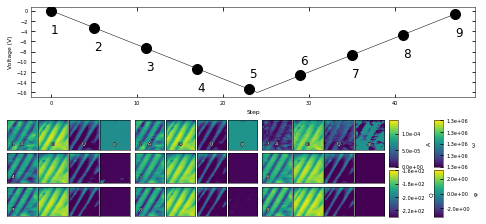

In [36]:
random_seed(seed=42)

postprocessor = ComplexPostProcessor(dataset)

model_ = Multiscale1DFitter(SHO_fit_func_nn, # function 
                            dataset.frequency_bin, # x data
                            2, # input channels
                            4, # output channels
                            dataset.SHO_scaler, 
                            postprocessor)

# instantiate the model
model = Model(model_, dataset, training=False, model_basename="SHO_Fitter_original_data")

model.load(
    "./Trained Models/SHO Fitter/SHO_Fitter_original_data_model_optimizer_Adam_epoch_4_train_loss_0.03404089391780737.pth"
)

# model.load_state_dict(torch.load("./Trained Models/SHO Fitter/SHO_Fitter_original_data_model_optimizer_Trust Region CG_epoch_599_train_loss_0.005903387442231178.pth"))

X_data, Y_data = dataset.NN_data()

# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = model.predict(X_data)

BE_viz.SHO_switching_maps(parm, filename="Figure_15_NN_Switching_Maps")

## Figure 4